Created on Mon May 4 12:28:05 2020 @author: 10540429 Source: 
https://www.kaggle.com/divyansh22/us-border-crossing-data

This dataset contains all the incidents of crossing the border into the US as provided by the Bureau of Transportation Statistics, Govt. of the US. This dataset tells about the incoming counts into the US.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Border_Crossing_Entry_Data.csv')

# Data Preparation

#### Missing values
There are no missing values in dataset. Data type check shows that two variables need conversion; date to datetime and Port Code to str. 
#### Data types
Two new columns have been created from the datetime column ; Year and Month. 
Dataset is now prepared for analysis. 

In [2]:
#checking the dataset 
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [3]:
#check info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  355511 non-null  object
 1   State      355511 non-null  object
 2   Port Code  355511 non-null  int64 
 3   Border     355511 non-null  object
 4   Date       355511 non-null  object
 5   Measure    355511 non-null  object
 6   Value      355511 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 19.0+ MB


In [4]:
#checkign data types 
df.dtypes

Port Name    object
State        object
Port Code     int64
Border       object
Date         object
Measure      object
Value         int64
dtype: object

In [5]:
#summary of data
df.describe()

,Port Code,Value
count,355511.000000,3.555110e+05
mean,2454.009921,2.844758e+04
std,1201.900231,1.518807e+05
min,101.000000,0.000000e+00
25%,2304.000000,0.000000e+00
50%,3013.000000,1.000000e+02
75%,3402.000000,2.597500e+03
max,4105.000000,4.447374e+06


In [6]:
#changing Date object to datetime 
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
dtype: object

In [7]:
#change Port Name to str
df['Port Code'] = df['Port Code'].apply(str)

In [8]:
#create a year column
df['Year'] = df['Date'].dt.year
df['Year']

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
355506    1996
355507    1996
355508    1996
355509    1996
355510    1996
Name: Year, Length: 355511, dtype: int64

In [9]:
#creating month column
df['Month'] = df['Date'].dt.month
df['Month']

0         2
1         2
2         2
3         2
4         2
         ..
355506    1
355507    1
355508    1
355509    1
355510    1
Name: Month, Length: 355511, dtype: int64

## US Border crossings over time 

Most crossings happen at US-Mexico Border. 
Data below shows that the number of crossings to the US had peeked in the year 2000 and had been at its lowest in 2011. 
Between 2012 and 2014 we can see according to "Frequency of border crossings per border YoY" that the drop in border crossing was in Mexico Border.
This is due to dramatic fall in crossings in TX, El Paso 

### Crossings per state
* US-Canada Border: Most crossings happen at the state of Michigan and New York 
* US-Mexico Border: Texas has the most crossings recorded but California has highest average number of crossings 
* Ohio has no recorded crossings before 2018.


In [10]:
#pivot table for border,state and number of crossings
viz1 = pd.pivot_table(df, values = 'Value', index= ['Border','State'],aggfunc = np.sum)
viz1 = viz1.sort_values(by=['Value'], ascending=False)
viz1

Value
Border           State            
US-Mexico Border TX     3747879529
                 CA     2602572970
                 AZ      918287879
US-Canada Border NY      854042599
                 MI      775410321
                 WA      521397911
                 ME      236781464
                 VT      118116868
                 MN       99126985
                 ND       78600964
US-Mexico Border NM       68560332
US-Canada Border MT       56139436
                 ID       21833390
                 AK       14676856
                 OH            607

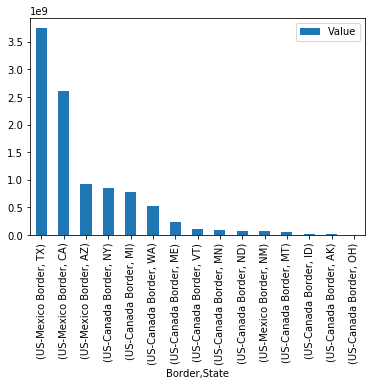

In [11]:
viz1.plot(kind="bar")

In [13]:
#group data by state 
viz2 = df.groupby('State').sum()
viz2 = viz2.sort_values(by=['Value'], ascending=False)
viz2

,Value
State,
TX,3747879529
CA,2602572970
AZ,918287879
NY,854042599
MI,775410321
WA,521397911
ME,236781464
VT,118116868
MN,99126985


In [17]:
#pivot for which state crossings grouped by year
viz3 = pd.pivot_table(df, values = 'Value', index= ['Border','State'],columns = 'Year',aggfunc = np.sum).T
viz3

Border US-Canada Border                                                \
State                AK         ID          ME          MI         MN   
Year                                                                    
1996           533846.0   912301.0  14625254.0  50694957.0  4489444.0   
1997           549898.0   917028.0  14362472.0  43840023.0  4232799.0   
1998           641446.0   870206.0  13697562.0  47720668.0  4541962.0   
1999           594558.0   919462.0  13226099.0  48570140.0  4716641.0   
2000           597226.0   905838.0  13061076.0  51544853.0  4815548.0   
2001           571401.0   877294.0  11413326.0  40170653.0  4464157.0   
2002           572053.0   796523.0  10300604.0  35711575.0  4200452.0   
2003           580050.0   724604.0  10392682.0  32937524.0  4367642.0   
2004           604488.0   708615.0  11527988.0  32593006.0  4593970.0   
2005           598815.0   743955.0  11586257.0  32677938.0  4401576.0   
2006           574681.0   795113.0  11306228.0  31382280.0  4175928.0   
2007           598001.0   839281.0   9303296.0  29940712.0  3781387.0   
2008           557098.0  1027960.0   8990331.0  27173787.0  3817113.0   
2009           569908.0   903460.0   8021605.0  23175289.0  3621329.0   
2010           568923.0  1029422.0   8817583.0  24116250.0  4081566.0   
2011           572395.0  1042863.0   8772871.0  24949949.0  3953171.0   
2012           598502.0  1029280.0   8914016.0  25738262.0  4056485.0   
2013           600360.0  1062151.0   8559379.0  26148885.0  4021611.0   
2014           614183.0  1078602.0   8050813.0  25387578.0  4002140.0   
2015           638128.0   951761.0   6731140.0  24054694.0  3787439.0   
2016           695183.0   909978.0   6259613.0  23461564.0  3642290.0   
2017           701630.0   891609.0   6225073.0  23134767.0  3660237.0   
2018           760035.0   897241.0   5983719.0  23054786.0  3637182.0   
2019           771540.0   893860.0   5905831.0  23954524.0  3591607.0   
2020            12508.0   104983.0    746646.0   3275657.0   473309.0   

Border                                                                  \
State          MT         ND          NY     OH         VT          WA   
Year                                                                     
1996    2546699.0  3055810.0  40711679.0    NaN  5747813.0  29721100.0   
1997    2604130.0  2804121.0  43111429.0    NaN  5432281.0  27658529.0   
1998    2563757.0  2833368.0  41888661.0    NaN  5150022.0  22384138.0   
1999    2853011.0  3170548.0  42784998.0    NaN  5630113.0  24031758.0   
2000    2430641.0  3275535.0  43230558.0    NaN  5549330.0  22379068.0   
2001    2255343.0  3114535.0  41644418.0    NaN  5292160.0  20289104.0   
2002    2203512.0  3186595.0  43761727.0    NaN  5271269.0  16828385.0   
2003    2143149.0  3085606.0  37541832.0    NaN  4958570.0  16006755.0   
2004    2235952.0  3183924.0  37157536.0    NaN  4901303.0  17188840.0   
2005    2319660.0  3184881.0  36202136.0    NaN  4372332.0  17156151.0   
2006    2470508.0  3259437.0  35897840.0    NaN  4973596.0  17872385.0   
2007    2215475.0  3375596.0  35179722.0    NaN  4823802.0  17434149.0   
2008    2096758.0  3500877.0  33580718.0    NaN  5163762.0  18072399.0   
2009    2038598.0  3000547.0  30890544.0    NaN  4557533.0  18222704.0   
2010    2319422.0  3485885.0  31486225.0    NaN  4596251.0  20968115.0   
2011    2298352.0  3523890.0  33003059.0    NaN  4668849.0  23899512.0   
2012    2457217.0  3855671.0  34042640.0    NaN  4891768.0  25920411.0   
2013    2515685.0  3763463.0  33275712.0    NaN  5026030.0  27262935.0   
2014    2519107.0  3753029.0  31726246.0    NaN  4961348.0  26474793.0   
2015    2253905.0  3285056.0  28824625.0    NaN  4642133.0  22387681.0   
2016    2187606.0  3071822.0  28153677.0    NaN  4518510.0  21051535.0   
2017    2169190.0  3164978.0  28766255.0    NaN  4308422.0  21246113.0   
2018    2102519.0  3157963.0  29111722.0  373.0  4123434.0  22585359.0   
2019    2098923.0  3080885.0  2

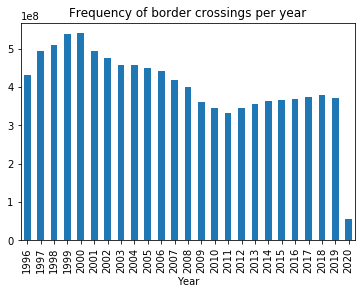

In [12]:
#Visualise frequency of border crossings per year
viz4 = df[['Year','Value']].groupby('Year').sum()
viz4.plot.bar(title='Frequency of border crossings per year',legend = None)

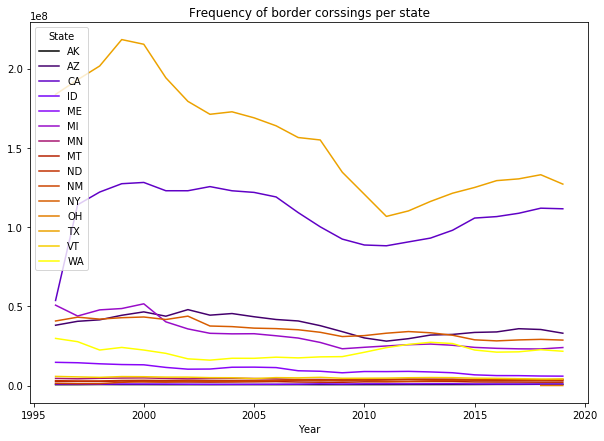

In [113]:
#Visualise frequency of border crossings per year by state
viz9 = pd.pivot_table(df, values = 'Value', index= ['Year'],columns = ['State'], aggfunc = np.sum)
viz9.loc[:2019].plot.line(title='Frequency of border corssings per state',figsize=(10,7),colormap='gnuplot')

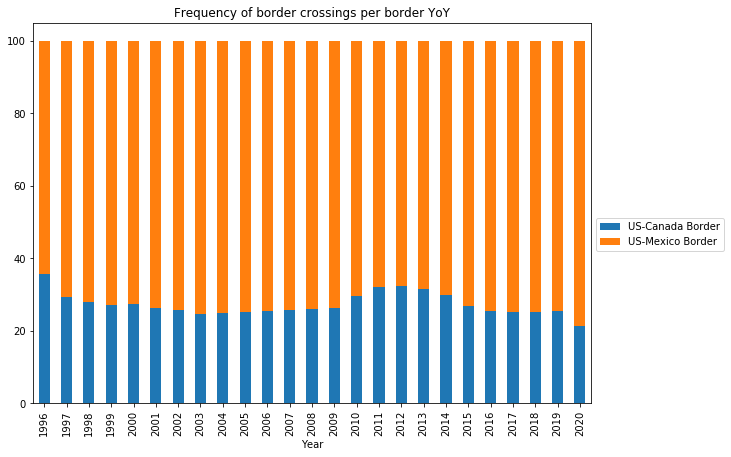

In [13]:
#yearly stacked barchart filtered by type of crossing 
viz8 = pd.pivot_table(df, values = 'Value', index= ['Year'],columns = 'Border',aggfunc = np.sum)
viz8 = viz8.apply(lambda x: x/sum(x)*100,axis = 1)
viz8.plot.bar(title='Frequency of border crossings per border YoY',stacked = True,figsize=(10,7)).legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEF2C6DB48>,
      dtype=object)

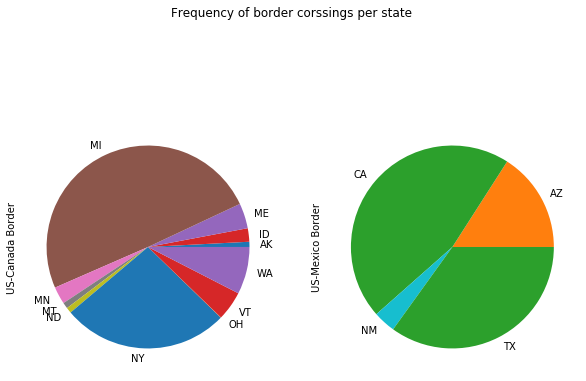

In [14]:
#avg yearly number of crossings per border per state 
viz9 = pd.pivot_table(df, values = 'Value', index= ['State'],columns = ['Border'], aggfunc = np.mean)
viz9.plot.pie(subplots = True, legend = None, title='Frequency of border corssings per state',figsize=(10,7))

# Crossing Transport modes change over time 

Overall there are more crossings via Bus, Rail Containers (full), Trucks and Tuck Containers (full) on Canada border than Mexico border.

Mexico has significantly higher number of pedestrians and personal vehicle crossings. 

### Change over time 
* The frequency of border crossings broken down by month show that US-Mexico Border Crossings are equally distributed thorought the year, while US-Canada crossings increase in July and August. 

* Looking at the crossings by the type of transport used we can see a clear decline in personal vehicle passengers since 2011 ,while other transport types have been without change.

* Overtime crossings at Canadian corder have been steadily falling since 1996.(beginning of this dataset)

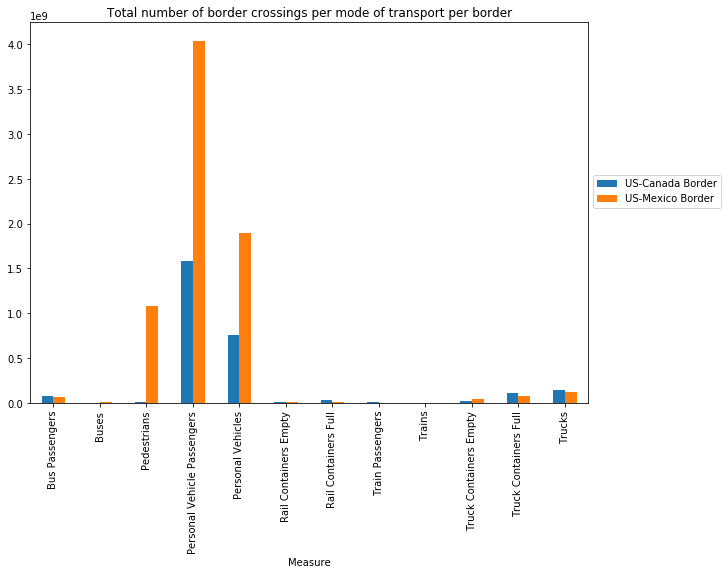

In [31]:
#transport modes comparison between Mexico and US Border crossings 
viz10 = pd.pivot_table(df, values = 'Value', columns = 'Border', index = ['Measure'],aggfunc = np.sum)
viz10.plot.bar(title='Total number of border crossings per mode of transport per border',figsize=(10,7)).legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEF7C53E88>,
      dtype=object)

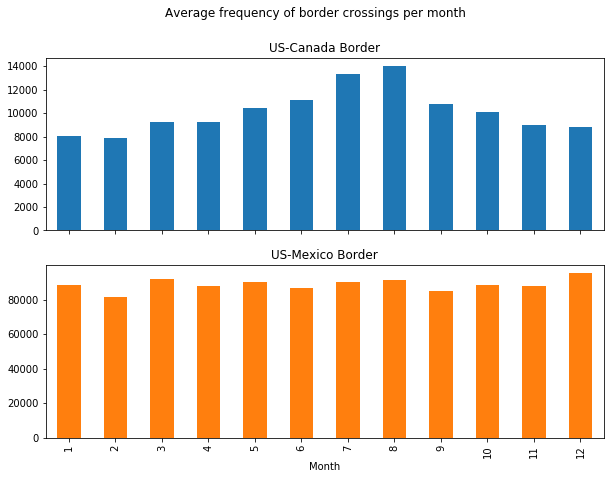

In [18]:
#average crossing per month
viz10 = pd.pivot_table(df, values = 'Value', columns = 'Border', index = 'Month',aggfunc = np.mean)
viz10.plot.bar(subplots = True, legend = None, title='Average frequency of border crossings per month',figsize=(10,7))

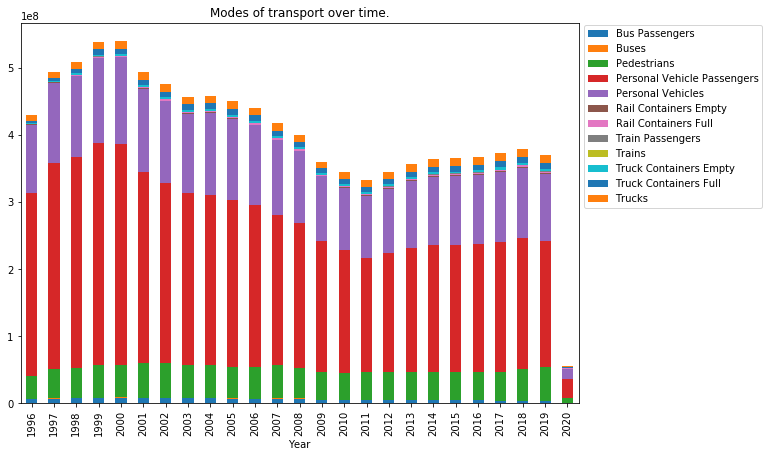

In [32]:
#year on year crossings per mode of transport
viz12 = pd.pivot_table(df, values = 'Value', columns = 'Measure', index = 'Year',aggfunc = np.sum)
viz12.plot.bar(stacked = True, title='Modes of transport over time.',figsize=(10,7)).legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))


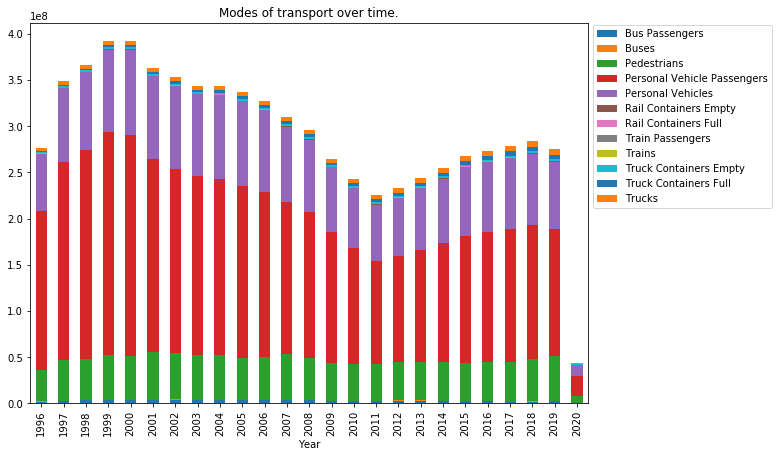

In [46]:
#reviewing mexico data only 
mx_df = df[df['Border'] =='US-Mexico Border']
#year on year crossings per mode of transport in Mexico
viz12 = pd.pivot_table(mx_df, values = 'Value', columns = 'Measure', index = 'Year',aggfunc = np.sum)
viz12.plot.bar(stacked = True, title='Modes of transport over time.',figsize=(10,7)).legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

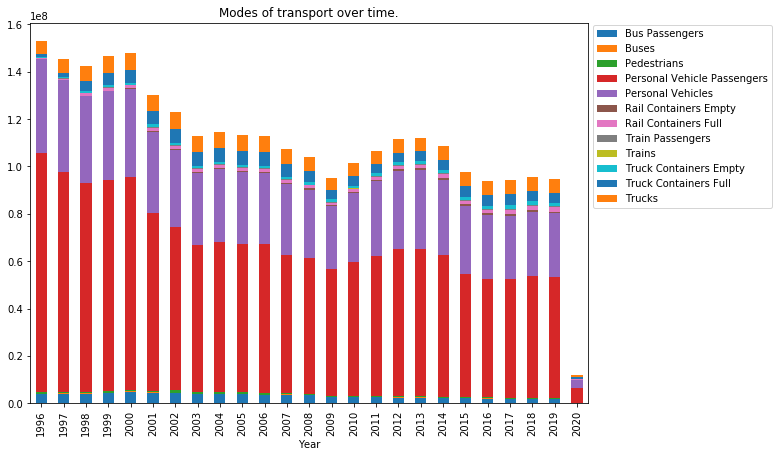

In [47]:
#reviewing canada data only 
cn_df = df[df['Border'] =='US-Canada Border']
#year on year crossings per mode of transport in Mexico
viz12 = pd.pivot_table(cn_df, values = 'Value', columns = 'Measure', index = 'Year',aggfunc = np.sum)
viz12.plot.bar(stacked = True, title='Modes of transport over time.',figsize=(10,7)).legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

# Crossings per Port Name 

### Mexico
* Over time of those records most crossings had happened at El Paso and San Ysidro entry ports - most popular
* Biggest fall on crossings has been seen in El Paso port in 2003

In [93]:
#crossings per port - Mexico
port_df = pd.pivot_table(mx_df, values = 'Value', columns = ['State','Port Name'], index = 'Year',aggfunc = np.sum)
port_df.head()

State             AZ                                                          \
Port Name    Douglas  Lukeville       Naco     Nogales    San Luis    Sasabe   
Year                                                                           
1996       6935023.0  1085200.0  1069136.0  17298040.0  11566958.0   84642.0   
1997       7460780.0  1525946.0  1143169.0  18391613.0  11889466.0   99387.0   
1998       8318421.0  1570158.0  1179783.0  18934117.0  11316072.0  122774.0   
1999       8834151.0  1978428.0  1256472.0  20111959.0  11995054.0  133663.0   
2000       9210484.0  1656529.0  1328792.0  21571994.0  12562236.0  125353.0   

State             CA                                                ...  \
Port Name    Andrade    Calexico Calexico East Cross Border Xpress  ...   
Year                                                                ...   
1996       3551780.0  32172466.0           0.0                 NaN  ...   
1997       3573449.0  34007914.0     7418320.0                 NaN  ...   
1998       3772276.0  36221460.0     7556984.0                 NaN  ...   
1999       4077016.0  35338551.0     9268961.0                 NaN  ...   
2000       4184302.0  35221950.0    10639009.0                 NaN  ...   

State             TX                                                  \
Port Name    Del Rio  Eagle Pass     El Paso     Hidalgo      Laredo   
Year                                                                   
1996       7267509.0   9369123.0  62242093.0  30959017.0  30098425.0   
1997       7590354.0   9985582.0  64101339.0  33778427.0  33153723.0   
1998       7791741.0  10630040.0  65679507.0  36554465.0  34699118.0   
1999       8402515.0  11671080.0  69579510.0  41947450.0  34413232.0   
2000       8237190.0  13198373.0  72553074.0  34690148.0  34255367.0   

State                                                                       
Port Name   Presidio   Progreso Rio Grande City       Roma Tornillo-Fabens  
Year                                                                        
1996       2189653.0  4825681.0       2681265.0  5843525.0       2544595.0  
1997       2328417.0  4783317.0       2649792.0  5906951.0       2633722.0  
1998       2492703.0  5076299.0       3132212.0  6099775.0       2263398.0  
1999       2796307.0  5834581.0       3348659.0  6598365.0       2818901.0  
2000       2661808.0  5643353.0       3202722.0  6621138.0       2846531.0  

[5 rows x 27 columns]

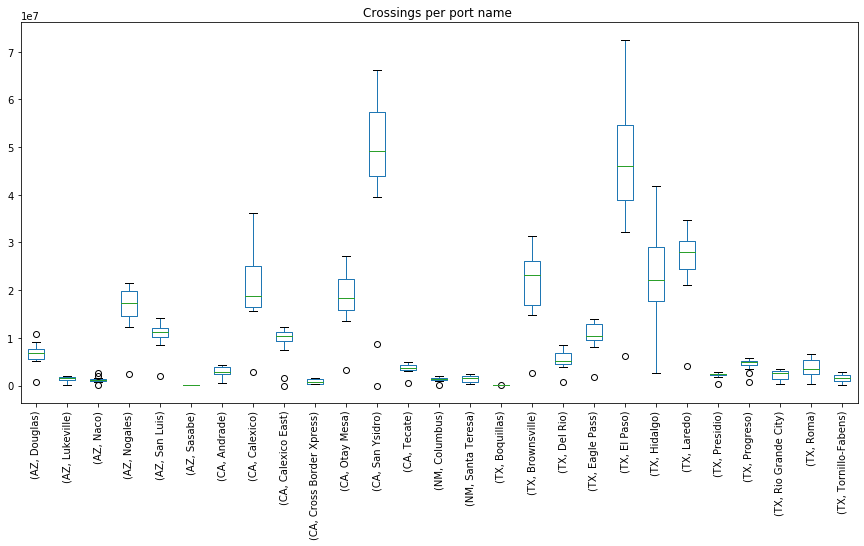

In [94]:
#boxplot with port names
port_df.plot.box(title='Crossings per port name ',figsize=(15,7),rot = 90)

In [89]:
port_df.describe()

Port Name,Andrade,Boquillas,Brownsville,Calexico,Calexico East,Columbus,Cross Border Xpress,Del Rio,Douglas,Eagle Pass,...,Presidio,Progreso,Rio Grande City,Roma,San Luis,San Ysidro,Santa Teresa,Sasabe,Tecate,Tornillo-Fabens
count,2.500000e+01,6.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,4.000000e+00,2.500000e+01,2.500000e+01,2.500000e+01,...,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01,2.500000e+01
mean,3.008176e+06,11978.333333,2.133442e+07,2.153820e+07,9.522849e+06,1.403477e+06,8.725878e+05,5.550015e+06,6.640158e+06,1.058583e+07,...,2.297371e+06,4.600713e+06,2.208557e+06,3.770275e+06,1.082592e+07,4.736796e+07,1.338936e+06,95649.640000,3.686101e+06,1.669557e+06
std,9.524046e+05,6089.136907,6.570647e+06,8.083330e+06,2.938848e+06,3.762716e+05,6.810870e+05,1.746460e+06,1.889097e+06,2.582434e+06,...,4.926662e+05,1.074474e+06,9.996295e+05,1.683225e+06,2.337922e+06,1.495874e+07,7.654812e+05,42574.286701,8.680534e+05,7.416490e+05
min,4.897680e+05,5621.000000,2.706529e+06,2.859530e+06,0.000000e+00,2.064870e+05,2.832630e+05,7.337150e+05,7.884570e+05,1.693839e+06,...,3.710570e+05,7.767560e+05,2.309770e+05,4.031300e+05,1.904922e+06,0.000000e+00,2.313640e+05,12646.000000,6.181510e+05,1.971330e+05
25%,2.377624e+06,7996.500000,1.681449e+07,1.643663e+07,9.268961e+06,1.221475e+06,3.013305e+05,4.423968e+06,5.486229e+06,9.545733e+06,...,2.168198e+06,4.307886e+06,1.270358e+06,2.443096e+06,1.022016e+07,4.400348e+07,7.262330e+05,60277.000000,3.255486e+06,1.000172e+06
50%,2.851344e+06,11232.000000,2.308184e+07,1.877801e+07,1.041683e+07,1.458938e+06,7.932135e+05,5.175016e+06,6.787812e+06,1.046842e+07,...,2.372948e+06,4.825681e+06,2.649792e+06,3.445448e+06,1.117117e+07,4.920874e+07,1.539739e+06,96451.000000,3.703800e+06,1.640918e+06
75%,3.801361e+06,13449.000000,2.611230e+07,2.498256e+07,1.112110e+07,1.632948e+06,1.364471e+06,6.774467e+06,7.566767e+06,1.284424e+07,...,2.495941e+06,5.237065e+06,3.132212e+06,5.251022e+06,1.199505e+07,5.738289e+07,2.014012e+06,133663.000000,4.287185e+06,2.263398e+06
max,4.360293e+06,22679.000000,3.142143e+07,3.622146e+07,1.218973e+07,1.995904e+06,1.620661e+06,8.402515e+06,1.086451e+07,1.393683e+07,...,2.893409e+06,5.834581e+06,3.514203e+06,6.621138e+06,1.423103e+07,6.624690e+07,2.438669e+06,159419.000000,4.974122e+06,2.846531e+06


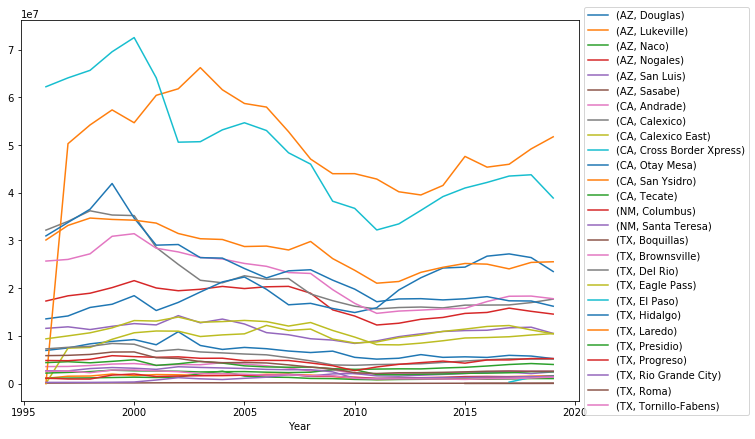

In [95]:
#removed 2020 from line chart due to incomplete data for 2020
port_df.loc[:'2019'].plot(figsize=(10,7)).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

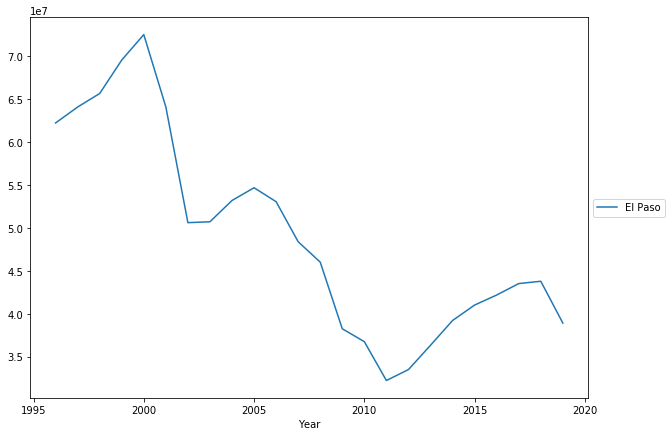

In [91]:
#removed 2020 from line chart due to incomplete data for 2020
port_df['El Paso'].loc[:'2019'].plot(figsize=(10,7)).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))